# OBP와 SLG

OBP = On-Base Percentage : 출루율
SLG = Slugging Percentage : 장타율

*Moneyball: The Art of Winning an Unfair Game*이라는 책이 출간되기 전에는 야구 시장에서 장타율이 선수(타자)의 실력을 입증하는 지표였음.
머니볼에서 타자의 출루율에 대한 분석이 이루어지면서 출루율이 중요한 지표가 되기 시작하였음.

타자들의 출루율과 장타율이 팀의 승률과 얼마나 관계되어 있는지 확인.

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [58]:
Teams = pd.read_excel("../Data/Game logs 1999-2003.xlsx")

In [59]:
Teams.head()

,date,game_number,day,visitor,visitor_lg,visitor_game_number,home,home_lg,home_game_number,visitor_score,...,home_batter_7_name,home_batter_7_pos,home_batter_8_id,home_batter_8_name,home_batter_8_pos,home_batter_9_id,home_batter_9_name,home_batter_9_pos,additional_info,acquisition
0,19990404,0,Sun,COL,NL,1,SDN,NL,1,8,...,Ruben Rivera,8,gomec001,Chris Gomez,6,ashba002,Andy Ashby,1,NaN,Y
1,19990405,0,Mon,TBA,AL,1,BAL,AL,1,7,...,B.J. Surhoff,7,johnc002,Charles Johnson,2,reboj001,Jeff Reboulet,4,NaN,Y
2,19990405,0,Mon,BOS,AL,1,KCA,AL,1,5,...,Chad Kreuter,2,sancr001,Rey Sanchez,6,feblc001,Carlos Febles,4,NaN,Y
3,19990405,0,Mon,NYA,AL,1,OAK,AL,1,3,...,Eric Chavez,5,hinca001,A.J. Hinch,2,tejam001,Miguel Tejada,6,NaN,Y
4,19990405,0,Mon,CHA,AL,1,SEA,AL,1,8,...,John Mabry,7,davir002,Russ Davis,5,wilsd001,Dan Wilson,2,NaN,Y


In [62]:
Teams.shape

(12142, 161)

In [63]:
Teams.columns.tolist()

['date',
 'game_number',
 'day',
 'visitor',
 'visitor_lg',
 'visitor_game_number',
 'home',
 'home_lg',
 'home_game_number',
 'visitor_score',
 'home_score',
 'outs',
 'daynight',
 'completion',
 'forfeit',
 'protest',
 'park',
 'attendance',
 'game_minutes',
 'visitor_linescore',
 'home_linescore',
 'visitor_ab',
 'visitor_h',
 'visitor_2b',
 'visitor_3b',
 'visitor_hr',
 'visitor_rbi',
 'visitor_sh',
 'visitor_sf',
 'visitor_hbp',
 'visitor_bb',
 'visitor_ibb',
 'visitor_so',
 'visitor_sb',
 'visitor_cs',
 'visitor_gidp',
 'visitor_ci',
 'visitor_lob',
 'visitor_pitchers_used',
 'visitor_individual_er',
 'visitor_team_er',
 'visitor_wp',
 'visitor_balks',
 'visitor_putouts',
 'visitor_assists',
 'visitor_errors',
 'visitor_passed_balls',
 'visitor_double_plays',
 'visitor_triple_plays',
 'home_ab',
 'home_h',
 'home_2b',
 'home_3b',
 'home_hr',
 'home_rbi',
 'home_sh',
 'home_sf',
 'home_hbp',
 'home_bb',
 'home_ibb',
 'home_so',
 'home_sb',
 'home_cs',
 'home_gidp',
 'home_ci',
 'h

# 각 팀의 연도별 승률, 출루율, 장타율을 계산하기 위해 데이터 가공

In [64]:
Teams['Year'] = Teams['date'].astype(str).str[0:4]
Teams['Year'] = Teams['Year'].astype(int)
Teams.head()

,date,game_number,day,visitor,visitor_lg,visitor_game_number,home,home_lg,home_game_number,visitor_score,...,home_batter_7_pos,home_batter_8_id,home_batter_8_name,home_batter_8_pos,home_batter_9_id,home_batter_9_name,home_batter_9_pos,additional_info,acquisition,Year
0,19990404,0,Sun,COL,NL,1,SDN,NL,1,8,...,8,gomec001,Chris Gomez,6,ashba002,Andy Ashby,1,NaN,Y,1999
1,19990405,0,Mon,TBA,AL,1,BAL,AL,1,7,...,7,johnc002,Charles Johnson,2,reboj001,Jeff Reboulet,4,NaN,Y,1999
2,19990405,0,Mon,BOS,AL,1,KCA,AL,1,5,...,2,sancr001,Rey Sanchez,6,feblc001,Carlos Febles,4,NaN,Y,1999
3,19990405,0,Mon,NYA,AL,1,OAK,AL,1,3,...,5,hinca001,A.J. Hinch,2,tejam001,Miguel Tejada,6,NaN,Y,1999
4,19990405,0,Mon,CHA,AL,1,SEA,AL,1,8,...,7,davir002,Russ Davis,5,wilsd001,Dan Wilson,2,NaN,Y,1999


In [65]:
Teams['home_win'] = np.where(Teams['home_score']>Teams['visitor_score'],1,0)
Teams['away_win'] = np.where(Teams['home_score']>Teams['visitor_score'],0,1)
Teams.head(15)

,date,game_number,day,visitor,visitor_lg,visitor_game_number,home,home_lg,home_game_number,visitor_score,...,home_batter_8_name,home_batter_8_pos,home_batter_9_id,home_batter_9_name,home_batter_9_pos,additional_info,acquisition,Year,home_win,away_win
0,19990404,0,Sun,COL,NL,1,SDN,NL,1,8,...,Chris Gomez,6,ashba002,Andy Ashby,1,NaN,Y,1999,0,1
1,19990405,0,Mon,TBA,AL,1,BAL,AL,1,7,...,Charles Johnson,2,reboj001,Jeff Reboulet,4,NaN,Y,1999,1,0
2,19990405,0,Mon,BOS,AL,1,KCA,AL,1,5,...,Rey Sanchez,6,feblc001,Carlos Febles,4,NaN,Y,1999,0,1
3,19990405,0,Mon,NYA,AL,1,OAK,AL,1,3,...,A.J. Hinch,2,tejam001,Miguel Tejada,6,NaN,Y,1999,1,0
4,19990405,0,Mon,CHA,AL,1,SEA,AL,1,8,...,Russ Davis,5,wilsd001,Dan Wilson,2,NaN,Y,1999,0,1
5,19990405,0,Mon,DET,AL,1,TEX,AL,1,11,...,Todd Zeile,5,clayr001,Royce Clayton,6,NaN,Y,1999,0,1
6,19990405,0,Mon,PHI,NL,1,ATL,NL,1,7,...,Walt Weiss,6,glavt001,Tom Glavine,1,NaN,Y,1999,0,1
7,19990405,0,Mon,SFN,NL,1,CIN,NL,1,11,...,Pokey Reese,4,tomkb001,Brett Tomko,1,NaN,Y,1999,0,1
8,19990405,0,Mon,NYN,NL,1,FLO,NL,1,2,...,Mike Redmond,2,ferna001,Alex Fernandez,1,NaN,Y,1999,1,0
9,19990405,0,Mon,ARI,NL,1,LAN,NL,1,6,...,Adrian Beltre,5,browk001,Kevin Brown,1,NaN,Y,1999,1,0


각 팀의 Home 경기, Away 경기 grouping

In [67]:
### 계산에 필요한 columns =
### ['visitor_ab', 'visitor_h', 'visitor_2b', 'visitor_3b', 'visitor_hr', 'visitor_sf',
### 'visitor_hbp','visitor_bb','home_ab', 'home_h', 'home_2b', 'home_3b',
### 'home_hr', 'home_sf', 'home_hbp', 'home_bb', 'home_win','away_win']

Home_team = Teams.groupby(['Year','home'])['visitor_ab', 'visitor_h', 'visitor_2b', 'visitor_3b', 'visitor_hr', 'visitor_sf',
                                           'visitor_hbp','visitor_bb','home_ab', 'home_h', 'home_2b', 'home_3b',
                                           'home_hr', 'home_sf', 'home_hbp', 'home_bb', 'home_win','away_win'].sum()
Home_team = Home_team.reset_index()
Home_team.head(30)

,Year,home,visitor_ab,visitor_h,visitor_2b,visitor_3b,visitor_hr,visitor_sf,visitor_hbp,visitor_bb,home_ab,home_h,home_2b,home_3b,home_hr,home_sf,home_hbp,home_bb,home_win,away_win
0,1999,ANA,2832,762,151,10,105,39,27,322,2666,669,118,13,74,21,23,267,37,44
1,1999,ARI,2814,693,132,22,84,16,27,256,2730,754,142,31,101,31,17,285,52,29
2,1999,ATL,2798,674,107,10,75,19,10,221,2668,704,158,9,86,28,22,286,56,25
3,1999,BAL,2827,760,112,15,101,27,30,329,2732,762,136,9,98,32,36,315,41,40
4,1999,BOS,2820,722,149,10,72,20,32,226,2722,793,177,20,80,29,30,305,49,32
5,1999,CHA,2934,826,140,4,106,30,30,281,2726,740,137,20,77,19,14,247,38,43
6,1999,CHN,2929,855,144,15,124,37,15,267,2707,730,140,22,98,25,17,294,34,47
7,1999,CIN,2798,671,164,10,116,16,23,326,2734,726,147,15,97,24,19,298,45,37
8,1999,CLE,2912,806,168,14,109,21,20,328,2752,819,137,16,110,33,19,370,47,34
9,1999,COL,3005,987,181,26,159,26,32,385,2938,955,174,26,144,30,23,269,39,42


In [68]:
Away_team = Teams.groupby(['Year','visitor'])['visitor_ab', 'visitor_h', 'visitor_2b', 'visitor_3b', 'visitor_hr', 'visitor_sf',
                                           'visitor_hbp','visitor_bb','home_ab', 'home_h', 'home_2b', 'home_3b',
                                           'home_hr', 'home_sf', 'home_hbp', 'home_bb', 'home_win','away_win'].sum()
Away_team = Away_team.reset_index()
Away_team.head(30)

,Year,visitor,visitor_ab,visitor_h,visitor_2b,visitor_3b,visitor_hr,visitor_sf,visitor_hbp,visitor_bb,home_ab,home_h,home_2b,home_3b,home_hr,home_sf,home_hbp,home_bb,home_win,away_win
0,1999,ANA,2828,735,130,9,84,21,20,244,2645,710,134,15,72,26,29,302,48,33
1,1999,ARI,2928,812,147,15,115,29,31,303,2751,694,123,12,92,14,22,287,33,48
2,1999,ATL,2901,777,151,14,111,19,31,322,2772,724,131,9,67,22,16,286,34,47
3,1999,BAL,2905,810,163,12,105,23,25,300,2638,708,157,19,97,22,19,318,44,37
4,1999,BOS,2857,758,157,22,96,27,25,292,2704,674,134,10,88,23,23,243,36,45
5,1999,CHA,2918,823,161,17,85,26,20,252,2766,782,136,14,104,26,31,315,44,37
6,1999,CHN,2775,681,115,13,91,19,22,277,2729,764,133,26,97,29,12,262,48,33
7,1999,CIN,2915,810,165,22,112,20,26,271,2626,638,138,13,74,27,22,310,30,51
8,1999,CLE,2882,810,172,16,99,34,36,373,2694,697,131,16,88,18,34,306,31,50
9,1999,COL,2779,689,131,13,79,16,20,239,2643,713,145,15,78,26,28,352,48,33


Home 경기, Away 경기 합치기 = Teams2

In [69]:
Home_team = Home_team.rename(columns={'home': 'Team'})
Away_team = Away_team.rename(columns={'visitor': 'Team'})

Teams2 = pd.merge(Home_team, Away_team, on=['Team','Year'])

In [71]:
Teams2.head(30)

,Year,Team,visitor_ab_x,visitor_h_x,visitor_2b_x,visitor_3b_x,visitor_hr_x,visitor_sf_x,visitor_hbp_x,visitor_bb_x,...,home_ab_y,home_h_y,home_2b_y,home_3b_y,home_hr_y,home_sf_y,home_hbp_y,home_bb_y,home_win_y,away_win_y
0,1999,ANA,2832,762,151,10,105,39,27,322,...,2645,710,134,15,72,26,29,302,48,33
1,1999,ARI,2814,693,132,22,84,16,27,256,...,2751,694,123,12,92,14,22,287,33,48
2,1999,ATL,2798,674,107,10,75,19,10,221,...,2772,724,131,9,67,22,16,286,34,47
3,1999,BAL,2827,760,112,15,101,27,30,329,...,2638,708,157,19,97,22,19,318,44,37
4,1999,BOS,2820,722,149,10,72,20,32,226,...,2704,674,134,10,88,23,23,243,36,45
5,1999,CHA,2934,826,140,4,106,30,30,281,...,2766,782,136,14,104,26,31,315,44,37
6,1999,CHN,2929,855,144,15,124,37,15,267,...,2729,764,133,26,97,29,12,262,48,33
7,1999,CIN,2798,671,164,10,116,16,23,326,...,2626,638,138,13,74,27,22,310,30,51
8,1999,CLE,2912,806,168,14,109,21,20,328,...,2694,697,131,16,88,18,34,306,31,50
9,1999,COL,3005,987,181,26,159,26,32,385,...,2643,713,145,15,78,26,28,352,48,33


    각 팀의 승리 = Home 경기의 home 팀 승리 (home_win_x) + Away 경기의 away 팀 승리 (away_win_y)
    경기 수 = Home 경기의 home_win 데이터 count + Away 경기의 away_win 데이터 count
    승률 = 승리/경기 수

    OBP = (h + bb + hbp)/(ab + bb + hbp + sf)
    SLG = (h - 2b - 3b - hr +2(2b) + 3(3b) + 4(hr)) /ab
    
    각 데이터 => Home 경기의 home 팀 데이터 + Away 경기의 away 팀 데이터


In [80]:
# 총 경기 수 계산

Home_game = Teams.groupby(['Year', 'home'])['home_win'].count()
Home_game = Home_game.reset_index()
Away_game = Teams.groupby(['Year', 'visitor'])['away_win'].count()
Away_game = Away_game.reset_index()
Home_game = Home_game.rename(columns={'home': 'Team'})
Away_game = Away_game.rename(columns={'visitor': 'Team'})

total_game = pd.merge(Home_game, Away_game, on=['Team','Year'])
total_game['Total'] = total_game['home_win'] + total_game['away_win']
Total = total_game[['Year','Team','Total']]
Total

,Year,Team,Total
0,1999,ANA,162
1,1999,ARI,162
2,1999,ATL,162
3,1999,BAL,162
4,1999,BOS,162
5,1999,CHA,162
6,1999,CHN,162
7,1999,CIN,163
8,1999,CLE,162
9,1999,COL,162


In [81]:
# 승리 수, OBP, SLG 계산

Teams2['W'] = Teams2['home_win_x'] + Teams2['away_win_y']
Teams2['OBP'] = ((Teams2['home_h_x']+Teams2['visitor_h_y']+
                Teams2['home_bb_x']+Teams2['visitor_bb_y']+
                Teams2['home_hbp_x']+Teams2['visitor_hbp_y'])/
                (Teams2['home_ab_x']+Teams2['visitor_ab_y']+
                 Teams2['home_bb_x']+Teams2['visitor_bb_y']+
                 Teams2['home_hbp_x']+Teams2['visitor_hbp_y']+
                 Teams2['home_sf_x']+Teams2['visitor_sf_y']))
Teams2['SLG'] = ((Teams2['home_h_x']+Teams2['visitor_h_y']-
                (Teams2['home_2b_x']+Teams2['visitor_2b_y'])-
                (Teams2['home_3b_x']+Teams2['visitor_3b_y'])-
                (Teams2['home_hr_x']+Teams2['visitor_hr_y'])+
                2*Teams2['home_2b_x']+2*Teams2['visitor_2b_y']+
                3*Teams2['home_3b_x']+3*Teams2['visitor_3b_y']+
                4*Teams2['home_hr_x']+4*Teams2['visitor_hr_y'])/
                (Teams2['home_ab_x']+Teams2['visitor_ab_y']))

In [83]:
Teams2.head()

,Year,Team,visitor_ab_x,visitor_h_x,visitor_2b_x,visitor_3b_x,visitor_hr_x,visitor_sf_x,visitor_hbp_x,visitor_bb_x,...,home_3b_y,home_hr_y,home_sf_y,home_hbp_y,home_bb_y,home_win_y,away_win_y,W,OBP,SLG
0,1999,ANA,2832,762,151,10,105,39,27,322,...,15,72,26,29,302,48,33,70,0.321511,0.394976
1,1999,ARI,2814,693,132,22,84,16,27,256,...,12,92,14,22,287,33,48,100,0.346553,0.458643
2,1999,ATL,2798,674,107,10,75,19,10,221,...,9,67,22,16,286,34,47,103,0.341246,0.435805
3,1999,BAL,2827,760,112,15,101,27,30,329,...,19,97,22,19,318,44,37,78,0.353015,0.447401
4,1999,BOS,2820,722,149,10,72,20,32,226,...,10,88,23,23,243,36,45,94,0.350406,0.447571


In [86]:
Teams3 = Teams2[['Year', 'Team', 'W', 'OBP', 'SLG']]
Teams3 = pd.merge(Teams3, Total, on=['Team', 'Year'])
Teams3['WPC'] = Teams3['W'] / Teams3['Total']
Teams3.head(30)

,Year,Team,W,OBP,SLG,Total,WPC
0,1999,ANA,70,0.321511,0.394976,162,0.432099
1,1999,ARI,100,0.346553,0.458643,162,0.617284
2,1999,ATL,103,0.341246,0.435805,162,0.635802
3,1999,BAL,78,0.353015,0.447401,162,0.481481
4,1999,BOS,94,0.350406,0.447571,162,0.580247
5,1999,CHA,75,0.336869,0.428951,162,0.462963
6,1999,CHN,67,0.329368,0.420102,162,0.413580
7,1999,CIN,96,0.340891,0.451230,163,0.588957
8,1999,CLE,97,0.373442,0.466631,162,0.598765
9,1999,COL,72,0.347640,0.471576,162,0.444444


# Regression

In [91]:
import statsmodels.formula.api as smf
import seaborn as sns

Text(0.5, 1.0, 'Relationship betwwen OBP and Winning Percent')

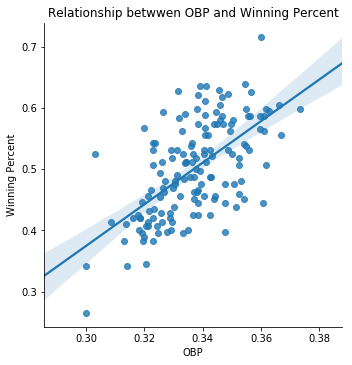

In [92]:
sns.lmplot(x='OBP', y='WPC', data=Teams3)
plt.xlabel('OBP')
plt.ylabel('Winning Percent')
plt.title('Relationship betwwen OBP and Winning Percent')

In [88]:
reg_obp = smf.ols(formula = 'WPC ~ OBP', data=Teams3).fit()
reg_obp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    WPC   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     91.63
Date:                Sun, 13 Jun 2021   Prob (F-statistic):           3.42e-17
Time:                        15:34:04   Log-Likelihood:                 206.51
No. Observations:                 150   AIC:                            -409.0
Df Residuals:                     148   BIC:                            -403.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6435      0.120     -5.382      0.000      -0.880      -0.407
OBP            3.3942      0.355      9.572      0.000       2.694       4.095
==============================================================================
Omnibus:                        2.506   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.286   Jarque-Bera (JB):                2.466
Skew:                           0.257   Prob(JB):                        0.291
Kurtosis:                       2.639   Cond. No.                         78.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Relationship betwwen SLG and Winning Percent')

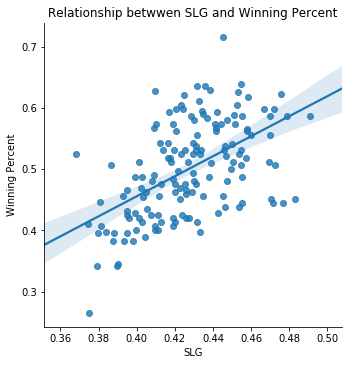

In [93]:
sns.lmplot(x='SLG', y='WPC', data=Teams3)
plt.xlabel('SLG')
plt.ylabel('Winning Percent')
plt.title('Relationship betwwen SLG and Winning Percent')

In [89]:
reg_slg = smf.ols(formula = 'WPC ~ SLG', data=Teams3).fit()
reg_slg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    WPC   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     60.33
Date:                Sun, 13 Jun 2021   Prob (F-statistic):           1.23e-12
Time:                        15:34:50   Log-Likelihood:                 196.01
No. Observations:                 150   AIC:                            -388.0
Df Residuals:                     148   BIC:                            -382.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1978      0.090     -2.197      0.030      -0.376      -0.020
SLG            1.6338      0.210      7.767      0.000       1.218       2.049
==============================================================================
Omnibus:                        1.266   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.531   Jarque-Bera (JB):                1.336
Skew:                           0.165   Prob(JB):                        0.513
Kurtosis:                       2.677   Cond. No.                         46.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

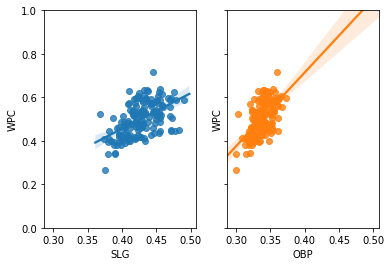

In [100]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True)
plt.ylim(0,1)
sns.regplot(x='SLG', y='WPC', data=Teams3, ax=ax1)
sns.regplot(x='OBP', y='WPC', data=Teams3, ax=ax2)

    팀의 승률과의 회귀계수가 OBP의 경우 3.394, SLG의 경우 1.634(p값이 둘 다 0.05보다 작기 때문에 통계적으로 유의함)
    OBP가 SLG보다 더 팀의 승률을 높이는데 기여함.
    